# Lab 11


Many of the examples have been adapted from Data100 and J. Canny's course.

**Required Files**  
The imdb.db files (see instructions below on getting this data).

## Lab Setup

In [1]:
# %pip install kaggle

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from getpass import getpass
import otter
grader = otter.Notebook()

import re
if re.search(r'amzn', os.uname().release):
    GS = True
else:
    GS = False

For this lab, we will be using SQLite to connect to databases. This is a simple, light-way module, there are of course other modules to interact with databases. 

SQLite has a [nice tutorial](https://www.sqlitetutorial.net/) if you want to learn more about database queries and explore additional options. 


In [3]:
import sqlite3

A couple of things to know about SQLite.  Other database systems such as `MySQL` and `PostgreSQL` use *static typing*, where a column is declared for a specific data type and can only store data of that type. 

SQLite uses *dynamic type system*, where a value stored in a column determines its data type, not the column's data type.  

### Printing out SQL calls and results 

We define a function `print_sql(s)` that given an sql query `s` returns the results of the executing. 

In [4]:
def print_sql(c, s):
    print('>', s)
    for result in c.execute(s):
        print(result)
    print()

We could also use `pandas` `read_sql` function to read in the results of the query to a dataframe to disply.  
*Be careful with running this code as it will create the dataframe - for a query that returns many records this could be memory-intensive*

In [5]:
def pretty_print_sql(c, s):
    print('>', s)
    df = pd.read_sql(s, c)
    display(df)
    return df

## IMDB data 


Let's look at some large data files!  We will use some data from [IMDB](https://www.imdb.com/). 


####  Database Creation 

Here is a summary on how the database was created. 

**Download data**

The data we are interested is available from [IMDB](https://www.imdb.com/interfaces/)

```python 
# From https://www.imdb.com/interfaces/
fetch_and_cache('https://datasets.imdbws.com/title.basics.tsv.gz', 'titles.tsv.gz') 
fetch_and_cache('https://datasets.imdbws.com/name.basics.tsv.gz', 'names.tsv.gz')
```

**Unzip files**

```bash 
$ gunzip -kf data/titles.tsv.gz
$ gunzip -kf data/names.tsv.gz
$ ls -lh data
```

**View files** 

If on a Mac, Linux computer. 

```bash
$ head -n5 data/titles.tsv 
$ head -n5 data/names.tsv
```

**Create the Database**

I have done this for you because it is easier using the command line with `sqlite3`.  

* First, removed the `"` that appear in the tab files.  
* Create database using the following commands. 

On a Mac/Linux box with sqlite3 v3.8 or higher, run the following commands at the terminal. 

```
(base) lebrown@lebrown-macbook data$ sqlite3 imdb.db
SQLite version 3.27.2 2019-02-25 16:06:06
Enter ".help" for usage hints.
sqlite> .mode tabs
sqlite> .import titles.tsv titles
sqlite> .import names.tsv names
sqlite> ^D
```


### Download the Database 

The `imdb.db` database is available for you to download on [Kaggle](https://www.kaggle.com/). 

You have already created your Kaggle account and can again use your API to access the data.

Copy and paste the key information (does not upload your key information). 

In [6]:
# if GS==False:
#     os.environ['KAGGLE_USERNAME'] = getpass("Enter Kaggle Username: ")
#     os.environ['KAGGLE_KEY'] = getpass("Enter Kaggle API Key: ")

#### Download the Data 

In [7]:
# if GS==False:
#     !kaggle datasets download -d lebrown/un5550-imdb # api copied from kaggle
#     !unzip un5550-imdb.zip

You now have the `imdb.db` database available to you.

### Using the Database 

After you have downloaded the database, you can comment out the above cells anytime you rerun your code. 

Also, in the lab several new tables will be added to the database.  If you want to start from a clean version of the database, unzip the downloaded file again overwriting the `imdb.db` file. 

In [8]:
if GS==False:
    conn = sqlite3.connect("imdb.db")

<!-- BEGIN QUESTION -->

## Exercise 1 

While we know the structure of the tables from IMDB, see how this info is laid out.

In `q1command`, specify a SQL statement that will return information on the tables in the database and their structure (i.e., what fields-types they have)

Use the `conn.execute(q1command)` function rather than the `pretty_print_sql(...)` function.  The output of this command can be stored in the string `q1output`. 

Your answer in `q1output` should look like: 

    CREATE TABLE titles(
      "tconst" TEXT,
      ...
    CREATE TABLE names(
      ...

In [9]:
q1command = 'SELECT sql FROM sqlite_master WHERE type = "table";'
q1output = ''
for exp in conn.execute(q1command):
    q1output = q1output+exp[0]
    
print(q1output)

CREATE TABLE titles(
  "tconst" TEXT,
  "titleType" TEXT,
  "primaryTitle" TEXT,
  "originalTitle" TEXT,
  "isAdult" TEXT,
  "startYear" TEXT,
  "endYear" TEXT,
  "runtimeMinutes" TEXT,
  "genres" TEXT
)CREATE TABLE names(
  "nconst" TEXT,
  "primaryName" TEXT,
  "birthYear" TEXT,
  "deathYear" TEXT,
  "primaryProfession" TEXT,
  "knownForTitles" TEXT
)CREATE TABLE dramas(
  id TEXT,
  title TEXT,
  time INT,
  year INT
)CREATE TABLE dramatics(
  name TEXT,
  profession,
  born INT,
  title TEXT,
  year INT
)CREATE TABLE name_to_title
                    (nconst TEXT,
                    tconst TEXT)CREATE TABLE name_to_profession
                    (nconst TEXT,
                    profession TEXT)


<!-- END QUESTION -->

## Exercise 2 

Let's look at just the first 10 entries from the `titles` relation. 

Your solution should be of the form: 
```
q2df = pretty_print_sql(<conn>, <query>) 
```

In [10]:
q2df = pretty_print_sql(conn, 'SELECT * FROM titles LIMIT 10;')

> SELECT * FROM titles LIMIT 10;


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [11]:
grader.check("q2")

q2 results: All test cases passed!

## Exercise 3 

Write a query to return the movies where the starting year > 2005.  

Your solution should be of the form: 
```
q3query = """
...
"""
q3df = pretty_print_sql(conn, q3query) 
```

where you fill in the ... of the `q3query`.

Display all fields of the appropriate table. 

Make sure to exclude records that are missing a starting year value (encoded as '\N') 

Limit your query to 10 records.  

In [12]:
q3query = """
SELECT * 
FROM titles 
WHERE startYear > 2005 AND startYear != '\\N' AND titleType = 'movie' 
LIMIT 10;
"""
q3df = pretty_print_sql(conn, q3query)

> 
SELECT * 
FROM titles 
WHERE startYear > 2005 AND startYear != '\N' AND titleType = 'movie' 
LIMIT 10;



,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0016906,movie,Frivolinas,Frivolinas,0,2014,\N,80,"Comedy,Musical"
1,tt0062336,movie,El Tango del Viudo y Su Espejo Deformante,El Tango del Viudo y Su Espejo Deformante,0,2020,\N,70,Drama
2,tt0065392,movie,Bucharest Memories,Amintiri bucurestene,0,2020,\N,\N,Documentary
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama
4,tt0072306,movie,Toula ou Le génie des eaux *,Toula ou Le génie des eaux *,0,2017,\N,90,Drama
5,tt0077649,movie,Isolation of 1/8800000,Hachijyu-Hachi-Man Bun no Ichi no Kodoku,0,2018,\N,50,\N
6,tt0082216,movie,The Cruise,Croaziera,0,2011,\N,122,Comedy
7,tt0087608,movie,Leila wa al ziap,Leila wa al ziap,0,2008,\N,90,Documentary
8,tt0100275,movie,The Wandering Soap Opera,La Telenovela Errante,0,2017,\N,80,"Comedy,Drama,Fantasy"
9,tt0110476,movie,Master i Margarita,Master i Margarita,0,2006,\N,125,"Drama,Fantasy"


In [13]:
grader.check("q3")

q3 results: All test cases passed!

## Exercise 4 

Write a query to return fantasy, TV shows (`tvEpisode`) starting in 2007 with a 43 minute running time.  

Your solution should be of the form: 
```
q4query = """
...
"""
q4df = pretty_print_sql(conn, q4query) 
```

where you fill in the `...` of `q4query`.

Display all fields of the appropriate table. 

Limit your query to return 10 records. 

In [14]:
q4query = """
SELECT * 
FROM titles 
WHERE genres LIKE '%Fantasy%' AND startYear > 2006 AND titleType = 'tvEpisode' AND runtimeMinutes = 43
LIMIT 10;
"""
q4df = pretty_print_sql(conn, q4query)

> 
SELECT * 
FROM titles 
WHERE genres LIKE '%Fantasy%' AND startYear > 2006 AND titleType = 'tvEpisode' AND runtimeMinutes = 43
LIMIT 10;



,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0863292,tvEpisode,Love Hurts,Love Hurts,0,2007,\N,43,"Drama,Fantasy,Horror"
1,tt0865034,tvEpisode,Blood Price,Blood Price,0,2007,\N,43,"Drama,Fantasy,Horror"
2,tt0865595,tvEpisode,Gifted,Gifted,0,2007,\N,43,"Drama,Fantasy,Horror"
3,tt0885600,tvEpisode,Bad JuJu,Bad JuJu,0,2007,\N,43,"Drama,Fantasy,Horror"
4,tt0891077,tvEpisode,Not in Portland,Not in Portland,0,2007,\N,43,"Adventure,Drama,Fantasy"
5,tt0893453,tvEpisode,Chapter Twelve 'Godsend',Chapter Twelve 'Godsend',0,2007,\N,43,"Drama,Fantasy,Sci-Fi"
6,tt0901193,tvEpisode,Chapter Thirteen 'The Fix',Chapter Thirteen 'The Fix',0,2007,\N,43,"Drama,Fantasy,Sci-Fi"
7,tt0904194,tvEpisode,Stone Cold,Stone Cold,0,2007,\N,43,"Drama,Fantasy,Horror"
8,tt0911175,tvEpisode,Post Partum,Post Partum,0,2007,\N,43,"Drama,Fantasy,Horror"
9,tt0913481,tvEpisode,Heart of Fire,Heart of Fire,0,2007,\N,43,"Drama,Fantasy,Horror"


In [15]:
grader.check("q4")

q4 results: All test cases passed!

## Example 1 -  Add new table for Dramas

Python allows for string substition with the following expression (new in Python 3.6)

In [16]:
# Python string substitution 
who, where = 'Laura', 'here'
temp = f"{who} is {where}"
temp

'Laura is here'

We will use this to select out information about drama movies. Then, create a new table titled `dramas` that we can use in the following questions. 

In [17]:
key = 'tconst'
title = 'primaryTitle'
time = 'runtimeMinutes'
year = 'startYear'
adult = 'isAdult'
kind = 'titleType'

select_drama = f'''
    SELECT {key} AS id,
           {title} AS title, 
           CAST({time} AS int) AS time, 
           CAST({year} AS int) AS year
    FROM titles
    WHERE genres LIKE '%Drama%' AND
          {year} > 1900 AND 
          {year} < 2019 AND
          {adult} = '0' AND
          {kind} = 'movie' AND
          time > 60
    '''
conn.executescript(f'''
    DROP TABLE IF EXISTS dramas;
    CREATE TABLE dramas AS {select_drama};
    ''')

Now we can query this table `dramas`

In [18]:
ex1 = pretty_print_sql(conn, 'SELECT * FROM dramas ORDER BY year DESC LIMIT 10')

> SELECT * FROM dramas ORDER BY year DESC LIMIT 10


,id,title,time,year
0,tt0069049,The Other Side of the Wind,122,2018
1,tt0192528,Heaven & Hell,104,2018
2,tt0276568,To Chase a Million,97,2018
3,tt0328810,My Land,102,2018
4,tt0360556,Fahrenheit 451,100,2018
5,tt0365545,Nappily Ever After,98,2018
6,tt0427543,A Million Little Pieces,113,2018
7,tt0825334,Caravaggio and My Mother the Pope,90,2018
8,tt0972544,Back Roads,101,2018
9,tt10004396,When I Became a Butterfly,102,2018


<!-- BEGIN QUESTION -->

## Exercise 5 

For this question you will plot the mean running time of dramas for each year.  
  
Use the `pd.read_sql` command frame your query, then use the DataFrame returned to make the plot. 

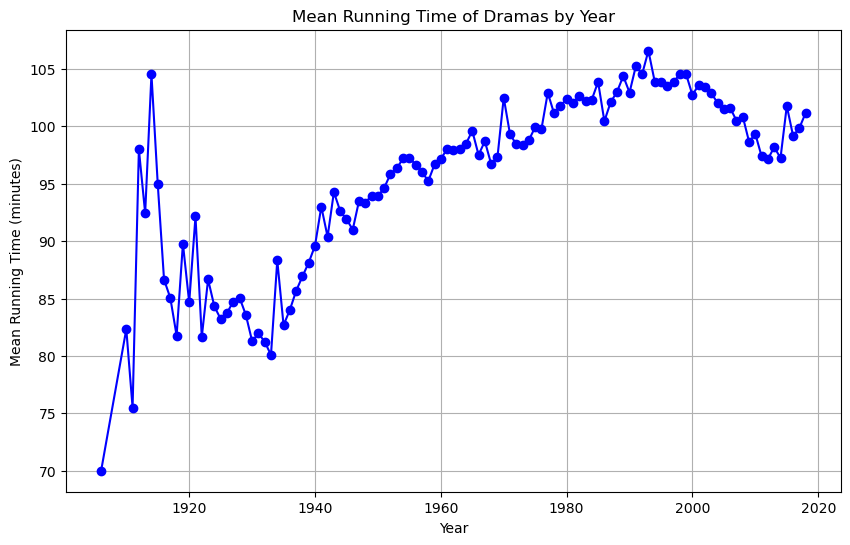

In [19]:
q5query = 'SELECT * FROM dramas ORDER BY year'
q5df = pd.read_sql(q5query, conn)

mean_time_per_year = q5df.groupby('year')['time'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_time_per_year.index, mean_time_per_year.values, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Mean Running Time (minutes)')
plt.title('Mean Running Time of Dramas by Year')
plt.grid(True)
plt.show()

<!-- END QUESTION -->

## Exercise 6 


The information above to make the plot (mean running time of the dramas for each year), you will now calculate using a query. 

Your query should return two attributes: `year` and `meanTime`.  

Your solution should be of the form: 
```
q6query = """
...
"""
q6df = pretty_print_sql(conn, q6query) 
```

where you fill in the `...` of `q6query`.

In [20]:
q6query = """
SELECT year, AVG(time) AS meanTime
FROM dramas
GROUP BY year
ORDER BY year
"""
q6df = pretty_print_sql(conn, q6query)

> 
SELECT year, AVG(time) AS meanTime
FROM dramas
GROUP BY year
ORDER BY year



,year,meanTime
0,1906,70.000000
1,1910,82.333333
2,1911,75.500000
3,1912,98.000000
4,1913,92.428571
...,...,...
105,2014,97.245250
106,2015,101.772231
107,2016,99.161021
108,2017,99.857568


In [21]:
grader.check("q6")

q6 results: All test cases passed!

## Example 2 -  Examine `names` table

Let's switch gears to consider the `names` table. 

In [22]:
pd.read_sql('SELECT DISTINCT * FROM names LIMIT 10;', conn)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0031983,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0059956,tt0054452,tt0057345,tt0049189"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0072562,tt0080455,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0060827,tt0050986,tt0050976"
5,nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer","tt0038787,tt0036855,tt0034583,tt0038109"
6,nm0000007,Humphrey Bogart,1899,1957,"actor,soundtrack,producer","tt0034583,tt0040897,tt0043265,tt0037382"
7,nm0000008,Marlon Brando,1924,2004,"actor,soundtrack,director","tt0078788,tt0068646,tt0047296,tt0070849"
8,nm0000009,Richard Burton,1925,1984,"actor,soundtrack,producer","tt0057877,tt0059749,tt0061184,tt0087803"
9,nm0000010,James Cagney,1899,1986,"actor,soundtrack,director","tt0035575,tt0042041,tt0031867,tt0029870"


We can create a DataFrame of selected information and people (using a query `select_actors`).  Only consider actors and actresses, born after 1950, list only their first known movie id. 

In [23]:
name = 'primaryName'
known = 'knownForTitles'
profession = 'primaryProfession'
born = 'birthYear'

select_actors = f'''
    SELECT DISTINCT {name} AS name, 
           CAST({born} AS int) AS born,
           SUBSTR({known}, 0, INSTR({known}, ',')) AS movie_id,
           CASE WHEN {profession} LIKE '%actor%' THEN 'actor' 
                WHEN {profession} LIKE '%actress%' THEN 'actress'   
                END AS profession
    FROM names
    WHERE {profession} LIKE '%act%' AND
          born > 1950
    '''
pd.read_sql(f'{select_actors} LIMIT 10', conn)

,name,born,movie_id,profession
0,Margaux Hemingway,1954,tt0102122,actress
1,Li Gong,1965,tt0397535,actress
2,Elena Koreneva,1953,tt7529350,actress
3,Brad Pitt,1963,tt0114746,actor
4,Gillian Anderson,1968,tt2294189,actress
5,Pamela Anderson,1967,tt0426592,actress
6,Jennifer Aniston,1969,tt0108778,actress
7,Patricia Arquette,1968,tt1065073,actress
8,Rowan Atkinson,1955,tt0110357,actor
9,Dan Aykroyd,1952,tt0080455,actor


<!-- BEGIN QUESTION -->

## Exercise 7A

Create a new table `dramatics` that joins the `select_actors` (from query above) with the `dramas` table by `movie_id` and returns the actor's `name`, `profession`, year `born` as well as their movie they are known for `title` and `year` it was released. 


Consider the `select_actors` query as a subquery.  Take a look at the information here on subqueries and the examples: 
https://www.sqlitetutorial.net/sqlite-subquery/  
https://www.w3resource.com/sqlite/sqlite-subqueries.php



In [24]:
select = f'''
    CREATE TABLE IF NOT EXISTS dramatics AS
    SELECT sa.name, 
           sa.profession, 
           sa.born, 
           d.title, 
           d.year
    FROM ({select_actors}) AS sa
    JOIN dramas d
    ON sa.movie_id = d.id;
'''

conn.executescript(select)

<!-- END QUESTION -->

## Exercise 7B 

Now query the new table `dramatics` created above and return 10 rows (all attributes) sorted by ascending year born and then year of movie .

In [25]:
q7bquery = """
SELECT *
FROM dramatics
ORDER BY born ASC, year ASC
LIMIT 10;
"""
q7bdf = pretty_print_sql(conn, q7bquery)

> 
SELECT *
FROM dramatics
ORDER BY born ASC, year ASC
LIMIT 10;



,name,profession,born,title,year
0,Susie Mathers,actress,1951,This Is My Love,1954
1,Dominique Vincent,actress,1951,Il prigioniero del re,1954
2,Columba Powell,actor,1951,Pursuit of the Graf Spee,1956
3,Tito Romalio,actor,1951,Priklyucheniya Artyomki,1956
4,Bad Latiff,actor,1951,Batu Belah Batu Bertangkup,1959
5,Michal Koblic,actor,1951,Lidé jako ty,1960
6,Peter Pike,actor,1951,It Takes a Thief,1960
7,Donald Losby,actor,1951,Tower of London,1962
8,Alan Howard,actor,1951,Ladybug Ladybug,1963
9,Ion Bocancea,actor,1951,Camera alba,1965


In [26]:
grader.check("q7b")

q7b results: All test cases passed!

## Example 3 - Add new tables 

Note, both the `titles` and `names` tables have fields that contains array of items, e.g., `names`- `knownForTitles`, `names` - `primaryProfession`, `titles` - `genres`, etc. 

We saw in Example 1 and Exercise 5 we can still extract rows that match a certain genre, e.g., "%Drama%".  Or, in Example 2, we can select the first title that an person is known for.  

However, classic relational database design should not contain lists of items in a field.  Therefore, we will expand out these fields to new tables. 

First, we will add a new table `name_to_title` that matches each name id `nconst` with the title id `tconst`.





In [27]:
cursor = conn.cursor()
cursor.execute("""Select * from names""")
all_data = cursor.fetchall()

In [28]:
cursor.execute("""CREATE TABLE IF NOT EXISTS name_to_title
                    (nconst TEXT,
                    tconst TEXT)""")

In [29]:
for single_data in all_data:
    person  = single_data[5].split(",")
    for single_data2 in person:
        cursor.execute("INSERT INTO name_to_title VALUES(:nconst,:tconst)", 
                       { "nconst": single_data[0], "tconst": single_data2 })
conn.commit()

In [30]:
print_sql(conn, 'SELECT * FROM name_to_title LIMIT 10;')

> SELECT * FROM name_to_title LIMIT 10;
('nm0000001', 'tt0053137')
('nm0000001', 'tt0031983')
('nm0000001', 'tt0050419')
('nm0000001', 'tt0072308')
('nm0000002', 'tt0038355')
('nm0000002', 'tt0071877')
('nm0000002', 'tt0117057')
('nm0000002', 'tt0037382')
('nm0000003', 'tt0059956')
('nm0000003', 'tt0054452')



We can also separate out the list of professions to a separate table `name_to_profession`. 

In [31]:
cursor = conn.cursor()
cursor.execute("""Select * from names""")
all_data = cursor.fetchall()

In [32]:
cursor.execute("""CREATE TABLE IF NOT EXISTS name_to_profession
                    (nconst TEXT,
                    profession TEXT)""")

In [33]:
for single_data in all_data:
    person  = single_data[4].split(",")
    for single_data2 in person:
        cursor.execute("INSERT INTO name_to_profession VALUES(:nconst,:prof)", 
                       { "nconst": single_data[0], "prof": single_data2 })
conn.commit()

In [34]:
print_sql(conn, 'SELECT * FROM name_to_profession LIMIT 10;')

> SELECT * FROM name_to_profession LIMIT 10;
('nm0000001', 'soundtrack')
('nm0000001', 'actor')
('nm0000001', 'miscellaneous')
('nm0000002', 'actress')
('nm0000002', 'soundtrack')
('nm0000003', 'actress')
('nm0000003', 'soundtrack')
('nm0000003', 'music_department')
('nm0000004', 'actor')
('nm0000004', 'soundtrack')



In [35]:
# Clean up variables (reduce memory usage)
del all_data

## Example 4 -  Age of Actors in Films 

We are now interested in looking at the age of actors (both actors and actresses) in movies. 

We can start to look at this by first examining the actors and actresses. 



In [36]:
ex4 = pretty_print_sql(conn, """
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
LIMIT 10;
""")

> 
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
LIMIT 10;



,nconst,name,born,profession
0,nm0000001,Fred Astaire,1899,actor
1,nm0000002,Lauren Bacall,1924,actress
2,nm0000003,Brigitte Bardot,1934,actress
3,nm0000004,John Belushi,1949,actor
4,nm0000005,Ingmar Bergman,1918,actor
5,nm0000006,Ingrid Bergman,1915,actress
6,nm0000007,Humphrey Bogart,1899,actor
7,nm0000008,Marlon Brando,1924,actor
8,nm0000009,Richard Burton,1925,actor
9,nm0000010,James Cagney,1899,actor


Next we want to examine the age of actors in different movies.  This means we need to combine the `actor` information with the date of the films.  

We can use a [Common Table Expression](https://www.essentialsql.com/introduction-common-table-expressions-ctes/). 

In [37]:
ex4b = pretty_print_sql(conn, """
WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;
""")

> 
WITH actors AS (
    SELECT n.nconst, 
        n.primaryName AS name, 
        n.birthYear AS born,
        ntp.profession
    FROM names n, name_to_profession ntp
    WHERE 
        n.nconst = ntp.nconst AND
        (ntp.profession = 'actor' OR ntp.profession = 'actress') 
    )
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;



,nconst,name,age,startYear,primaryTitle,profession
0,nm0000001,Fred Astaire,40,1939,The Story of Vernon and Irene Castle,actor
1,nm0000001,Fred Astaire,40,1939,The Story of Vernon and Irene Castle,actor
2,nm0000001,Fred Astaire,58,1957,Funny Face,actor
3,nm0000001,Fred Astaire,58,1957,Funny Face,actor
4,nm0000001,Fred Astaire,60,1959,On the Beach,actor
5,nm0000001,Fred Astaire,60,1959,On the Beach,actor
6,nm0000001,Fred Astaire,75,1974,The Towering Inferno,actor
7,nm0000001,Fred Astaire,75,1974,The Towering Inferno,actor
8,nm0000002,Lauren Bacall,20,1944,To Have and Have Not,actress
9,nm0000002,Lauren Bacall,20,1944,To Have and Have Not,actress


We can use "format strings" to plug into the queries. 

In [38]:
actors_query = """
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
"""

In [39]:
ex4c = pretty_print_sql(conn, f"""
WITH actors AS ({actors_query})
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;
""")

> 
WITH actors AS (
SELECT n.nconst, 
    n.primaryName AS name, 
    n.birthYear AS born,
    ntp.profession
FROM names n, name_to_profession ntp
WHERE 
    n.nconst = ntp.nconst AND
    (ntp.profession = 'actor' OR ntp.profession = 'actress') 
)
SELECT 
    a.nconst,
    a.name,
    t.startYear - a.born AS age,
    t.startYear,
    t.primaryTitle,
    a.profession
FROM 
    actors a, 
    name_to_title nt, 
    titles t
WHERE 
    a.nconst = nt.nconst AND nt.tconst = t.tconst 
LIMIT 10;



,nconst,name,age,startYear,primaryTitle,profession
0,nm0000001,Fred Astaire,40,1939,The Story of Vernon and Irene Castle,actor
1,nm0000001,Fred Astaire,40,1939,The Story of Vernon and Irene Castle,actor
2,nm0000001,Fred Astaire,58,1957,Funny Face,actor
3,nm0000001,Fred Astaire,58,1957,Funny Face,actor
4,nm0000001,Fred Astaire,60,1959,On the Beach,actor
5,nm0000001,Fred Astaire,60,1959,On the Beach,actor
6,nm0000001,Fred Astaire,75,1974,The Towering Inferno,actor
7,nm0000001,Fred Astaire,75,1974,The Towering Inferno,actor
8,nm0000002,Lauren Bacall,20,1944,To Have and Have Not,actress
9,nm0000002,Lauren Bacall,20,1944,To Have and Have Not,actress


<!-- BEGIN QUESTION -->

## Exercise 8 

Let's calculate the average age of an actor (actors and actresses) in a movie (the `startYear` for a movie - when an actor was born `birthYear`), for all actors born after 1900. 

Your answer should be a single entry in a DataFrame.

In [40]:
actor_query = '''
WITH actors AS (
    SELECT n.nconst, 
           n.birthYear AS born,
           ntp.profession
    FROM names n
    JOIN name_to_profession ntp ON n.nconst = ntp.nconst
    WHERE (ntp.profession = 'actor' OR ntp.profession = 'actress') 
      AND n.birthYear > 1900
)
SELECT 
    AVG(t.startYear - a.born) AS average_age
FROM 
    actors a
JOIN name_to_title nt ON a.nconst = nt.nconst
JOIN titles t ON nt.tconst = t.tconst
WHERE t.startYear IS NOT NULL AND a.born IS NOT NULL;
'''   


q8df = pretty_print_sql(conn, actor_query)

> 
WITH actors AS (
    SELECT n.nconst, 
           n.birthYear AS born,
           ntp.profession
    FROM names n
    JOIN name_to_profession ntp ON n.nconst = ntp.nconst
    WHERE (ntp.profession = 'actor' OR ntp.profession = 'actress') 
      AND n.birthYear > 1900
)
SELECT 
    AVG(t.startYear - a.born) AS average_age
FROM 
    actors a
JOIN name_to_title nt ON a.nconst = nt.nconst
JOIN titles t ON nt.tconst = t.tconst
WHERE t.startYear IS NOT NULL AND a.born IS NOT NULL;



,average_age
0,1673.373891


<!-- END QUESTION -->

Note, you may get a value that doesn't really make sense.  We will try to fix this in the Bonus Question. 

<!-- BEGIN QUESTION -->

## Bonus Question

Let's dive into the results. Because these queries can take a while, let's pull this information from Exercise 8 into a DataFrame, but returning information like `name`, `age`, `title.startYear`, `t.primaryTitle`.  

Use `df = pd.read_sql("query", conn)`

In [41]:
...
actor_query = '''
WITH actors AS (
    SELECT n.nconst, 
           n.primaryName AS name,
           n.birthYear AS born,
           ntp.profession
    FROM names n
    JOIN name_to_profession ntp ON n.nconst = ntp.nconst
    WHERE (ntp.profession = 'actor' OR ntp.profession = 'actress') 
      AND n.birthYear > 1900
)
SELECT 
    t.startYear,
    a.profession,
    t.primaryTitle AS title,
    a.name,
    (t.startYear - a.born) AS age
FROM 
    actors a
JOIN name_to_title nt ON a.nconst = nt.nconst
JOIN titles t ON nt.tconst = t.tconst
WHERE 
    t.startYear BETWEEN 1940 AND 2020
    AND a.born IS NOT NULL
    AND t.startYear IS NOT NULL
    AND a.born < t.startYear  -- Ensures age is positive
'''  


df = pd.read_sql(actor_query, conn)

In [42]:
df.age.mean()

np.float64(35.43558002339893)

In [43]:
df.sort_values("age").head()

,startYear,profession,title,name,age
3826825,1964,actress,Acemi çapkin,Nihal Kaplangi,1
3826832,1964,actress,Acemi çapkin,Nihal Kaplangi,1
3826833,1964,actress,Acemi çapkin,Nihal Kaplangi,1
4686102,1970,actress,Tatort,Angelika Gersdorf,1
4686103,1970,actress,Tatort,Angelika Gersdorf,1


Try to solve issues the "\N" missing values introduce. 

You can scan and sort through your DataFrame `df` to spot different potential issues. 

Considering only movies with a start year between 1940 and 2020, list all the issues the missing values that must be considered and accounted for. 

* ...
* ...

Rewrite your query to account for these issues and produce a DataFrame that has for each year of film, the profession ('actor' and 'actress'), the average age of profession, and the number ("count") of the profession.

In [ ]:
actor_query = """
WITH actors AS (
    SELECT n.nconst, 
           n.birthYear AS born,
           ntp.profession
    FROM names n
    JOIN name_to_profession ntp ON n.nconst = ntp.nconst
    WHERE (ntp.profession = 'actor' OR ntp.profession = 'actress') 
      AND n.birthYear > 1900
)
SELECT 
    t.startYear AS year,
    a.profession,
    AVG(t.startYear - a.born) AS average_age,
    COUNT(a.nconst) AS count
FROM 
    actors a
JOIN name_to_title nt ON a.nconst = nt.nconst
JOIN titles t ON nt.tconst = t.tconst
WHERE 
    t.startYear BETWEEN 1940 AND 2020
    AND a.born IS NOT NULL
    AND t.startYear IS NOT NULL
    AND a.born < t.startYear  -- Ensures age is positive
GROUP BY 
    t.startYear, 
    a.profession
ORDER BY 
    t.startYear, 
    a.profession;
"""

# Execute the query and load the result into a DataFrame
df = pd.read_sql(actor_query, conn)
df.head(20)

<!-- END QUESTION -->



In [ ]:
# Close your DB connection 
conn.close()

## Congratulations! You have finished Lab 11!

For this assignment, the results and variables you create in your notebook will be saved out to a log file `.OTTER_LOG`.  This file will be included in your zip, when you run the export function below. 


Make sure you have run all cells in your notebook **in order** before running the cell below, so that all information gets saved to the log file correctly. The cell below will generate a zip file for you to submit. **Please save before exporting!**

If you run the notebook repeatedly, more and more information gets added to the `.OTTER_LOG` file. 

<div class="alert alert-warning">
<strong>Warning! - Clean log file</strong>     
    Before running your last single run through the notebook, clear all clear, restart the kernel, delete the `.OTTER_LOG` so that a fresh one is created. 
</div>

Your `.OTTER_LOG` file and `lab11.otter` should be part of the zip submission (the export function does this automatically).   

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)